In [205]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import warnings

warnings.filterwarnings("ignore")

# Load the glass dataset
glass_data = pd.read_csv('/content/glass.csv')

glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [206]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [207]:
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [208]:
glass_data.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [209]:
glass_data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

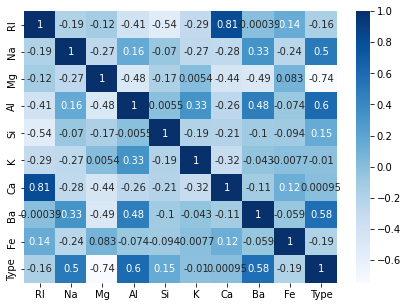

In [210]:
plt.figure(figsize=(7,5))
sns.heatmap(glass_data.corr(), annot=True, cmap='Blues')
plt.show()

In [211]:
# Split the data into training and testing sets
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [212]:
# Fit the Naive Bayes model to the training data
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Predict the class labels on the test data
y_pred_nb = model_nb.predict(X_test)

# Evaluate the model's performance on the test data
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Accuracy: 0.4883720930232558
Classification Report:
               precision    recall  f1-score   support

           1       0.39      0.92      0.55        12
           2       0.43      0.18      0.25        17
           3       0.00      0.00      0.00         3
           5       0.50      0.25      0.33         4
           7       1.00      0.86      0.92         7

    accuracy                           0.49        43
   macro avg       0.46      0.44      0.41        43
weighted avg       0.49      0.49      0.43        43



In [213]:
# Fit the linear SVM model to the training data
model_svc = svm.LinearSVC()
model_svc.fit(X_train, y_train)

# Predict the class labels on the test data
y_pred_svc = model_svc.predict(X_test)

# Evaluate the model's performance on the test data
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))


Accuracy: 0.3953488372093023
Classification Report:
               precision    recall  f1-score   support

           1       0.42      0.83      0.56        12
           2       0.00      0.00      0.00        17
           3       0.08      0.33      0.13         3
           5       0.50      0.25      0.33         4
           7       1.00      0.71      0.83         7

    accuracy                           0.40        43
   macro avg       0.40      0.43      0.37        43
weighted avg       0.33      0.40      0.33        43



In [214]:
print("Accuracy score of NB:", accuracy_score(y_test, y_pred_nb))
print("Accuracy score of SVC:", accuracy_score(y_test, y_pred_svc))

Accuracy score of NB: 0.4883720930232558
Accuracy score of SVC: 0.3953488372093023


By comparing both accuarcy scores Naive Bayes model and SVM - Naive Bayes model is best